In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
import plotly
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
map = folium.Map(location = [40.730610, -73.935242], zoom_start = 10)


In [ ]:
fg = folium.FeatureGroup(name = "AirBNB")

In [ ]:
fg.add_child(folium.Marker(location =[40.730610, -73.935242], popup = "NYC",icon = folium.Icon(color = "green") ))
map.add_child(fg)
#map.save("folium.html")

In [ ]:

for coordinate in [[40.830610, -73.735242],[40.730710, -73.935342]]:
    fg.add_child(folium.Marker(location =[coordinate[0],coordinate[1]], popup = "NYC",icon = folium.Icon(color = "green") ))
map.add_child(fg)
map.save("folium.html")

In [3]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
sns.distplot(data["price"])

In [ ]:
Staten = data[data["neighbourhood_group"]== "Staten Island"]
Staten.head()

In [ ]:
lat = list(Staten["latitude"])

In [ ]:
lon = list(Staten["longitude"])

In [ ]:
price  = list(Staten["price"])

In [ ]:
def color_producer(price):
    if (price <500):
        return("green")
    elif (501<=price<1500):
        return("orange")
    else:
        return("red")

In [ ]:
for lt, ln, pr in zip(lat,lon, price):
    fg.add_child(folium.Marker(location =[lt,ln], popup = str(pr),icon = folium.Icon(color = color_producer(pr)) ))
map.add_child(fg)
map.save("state.html")

In [ ]:
print(data.isnull().sum())

In [4]:
data_new = data[pd.notnull(data["name"])]

In [5]:
data_new = data_new[pd.notnull(data_new["host_name"])]

In [6]:
print(data_new.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
grouped = data_new.groupby("neighbourhood_group", as_index = False)

In [ ]:
grouped["neighbourhood"].count()

##### Find the number of room type in each neighborhood

In [ ]:
nrt = pd.crosstab(index=data_new["neighbourhood_group"], 
                          columns=data_new["room_type"])

In [ ]:
pd.crosstab(index=data_new["neighbourhood"], 
                          columns=data_new["room_type"])

In [ ]:
data_new["neighbourhood_group"].unique()

In [ ]:
neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
sns.countplot(data_new["neighbourhood_group"])

In [ ]:
nrt.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

###  Check for price deviations in room types

In [ ]:
data_new.boxplot(column="price",        # Column to plot
                 by= "room_type",         # Column to split upon
                 figsize= (8,8))

In [ ]:
data_new.head()

In [ ]:
review_data =data_new.sort_values(by=['number_of_reviews'],ascending=False).head(300)



In [ ]:
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
map_Rev=folium.Map([Lat,Long],zoom_start=10,)

mapRev_rooms_map=plugins.MarkerCluster().add_to(map_Rev)

for lat,lon,label in zip(review_data.latitude,review_data.longitude,review_data.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapRev_rooms_map)
map_Rev.add_child(mapRev_rooms_map)

map_Rev.save("reviews.html")

In [ ]:
price_data=data_new.sort_values(by=['price'],ascending=False).head(300)


In [ ]:
print('Most Expensive rooms')
Long=-73.80
Lat=40.80
map_Rev=folium.Map([Lat,Long],zoom_start=10,)

mapRev_rooms_map=plugins.MarkerCluster().add_to(map_Rev)

for lat,lon,label in zip(price_data.latitude,price_data.longitude,price_data.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapRev_rooms_map)
map_Rev.add_child(mapdf1_rooms_map)

mapdf1.save("expensive_room.html")

In [9]:
data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
neighbourhood_group

In [ ]:
data_new[data_new["neighbourhood_group"]=="Brooklyn"]

In [ ]:
df3=data_new.groupby(['neighbourhood_group']).mean()

In [ ]:
df3.drop(["latitude","longitude","host_id","id"],axis= 1, inplace = True)

In [ ]:
df3.head()

In [ ]:
df3.reset_index(level=0, inplace = True)

In [ ]:
sns.scatterplot(df3.neighbourhood_group, df3.price)

In [ ]:
plt.plot(df3.neighbourhood_group, df3.price,marker='o',markersize=18)
plt.title("Average Price in Neighbourhood")
plt.show()

In [ ]:
plt.plot(df3.neighbourhood_group, df3.number_of_reviews,marker='o',markersize=18)
plt.title("Average Reviews in Neighbourhood")
plt.show()

In [ ]:
data_new['room_type'].value_counts()

In [ ]:
data_new.columns

In [ ]:
nrt_mean = data_new.groupby(['neighbourhood_group','room_type']).mean()

In [ ]:
nrt_mean

In [ ]:
nrt_mean.drop(['id',  'host_id', 'latitude', 'longitude'],axis = 1, inplace = True)

In [ ]:
nrt_mean

In [ ]:


g = sns.FacetGrid(data_new, col = "neighbourhood_group", hue = "room_type")
g.map(sns.barplot, "price")
plt.show()

In [ ]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data_new["neighbourhood_group"], hue = data_new["room_type"])

In [ ]:
help(sns.countplot)

In [ ]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
data_new["price"].hist(bins= 1000)

In [ ]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxenplot(data_new["price"])

## PREDICTING PRICE

In [7]:

print(data_new.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [8]:
data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data_new.drop(['name','id','host_name','last_review'],axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer

In [8]:
lab_enc = LabelEncoder()
norm = Normalizer()

In [9]:
data_new["neighbourhood_group"]= lab_enc.fit_transform(data_new["neighbourhood_group"])
data_new["neighbourhood"]= lab_enc.fit_transform(data_new["neighbourhood"])
data_new["room_type"]= lab_enc.fit_transform(data_new["room_type"])
data_new.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [12]:
data_new.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
data_new["reviews_per_month"].fillna(0, inplace = True)

In [11]:
data_new.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [12]:
data_new.drop(['latitude', 'longitude'],axis=1,inplace=True)

In [13]:
data_new.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [14]:
x = data_new[["host_id", "neighbourhood_group", 'neighbourhood', 'room_type', 
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
y = data_new[["price"]]

In [15]:
normalized_x = norm.fit_transform(x)

In [16]:
pd.DataFrame(normalized_x).head()

,0,1,2,3,4,5,6,7,8
0,0.990794,0.000356,0.038395,0.000356,0.000356,0.003200,0.000075,0.002133,0.129760
1,0.991210,0.000697,0.044247,0.000000,0.000348,0.015678,0.000132,0.000697,0.123684
2,0.996705,0.000430,0.020227,0.000215,0.000646,0.000000,0.000000,0.000215,0.078540
3,0.997641,0.000205,0.008401,0.000000,0.000205,0.055322,0.000951,0.000205,0.039750
4,0.999962,0.000278,0.008481,0.000000,0.001390,0.001251,0.000014,0.000139,0.000000


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 111 )

# LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lm_pred = lm.predict(x_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
r2_score(y_test, lm_pred)*100

7.826029993084626

In [31]:
mean_squared_error(y_test, lm_pred)

48288.022806003835

In [32]:
lm_errors = pd.DataFrame({'Actuals': np.array(y_test).flatten(), 'Predicted': lm_pred.flatten()})


In [33]:
lm_errors.head(5)

,Actuals,Predicted
0,55,111.680363
1,80,83.368688
2,80,65.508401
3,45,66.006005
4,399,204.420434


C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



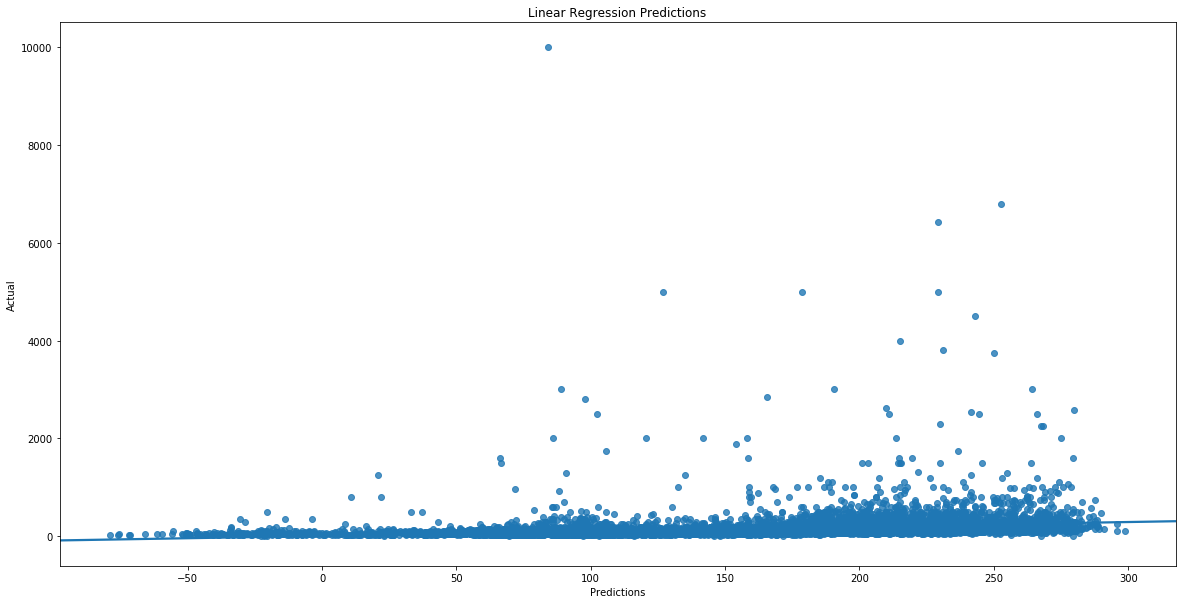

In [34]:
plt.figure(figsize= (20,10))
sns.regplot(lm_errors["Predicted"],lm_errors["Actuals"])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Regression Predictions")
plt.show()

In [35]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

In [45]:
ad_reg = AdaBoostRegressor(n_estimators= 2000, learning_rate= 0.01, random_state = 111)

In [40]:
help(AdaBoostRegressor)

Help on class AdaBoostRegressor in module sklearn.ensemble.weight_boosting:

class AdaBoostRegressor(BaseWeightBoosting, sklearn.base.RegressorMixin)
 |  AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |  
 |  An AdaBoost regressor.
 |  
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=None)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is required. If ``None``,

In [46]:
ad_reg.fit(x_train,y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=2000, random_state=111)

In [47]:
ad_pred = ad_reg.predict(x_test)

In [48]:
r2_score(y_test, ad_pred)

-0.2572724885622386

In [49]:
ad_errors = pd.DataFrame({'Actuals': np.array(y_test).flatten(), 'Predicted': ad_pred.flatten()})


In [50]:
ad_errors.head()

,Actuals,Predicted
0,55,283.448006
1,80,128.699354
2,80,105.386719
3,45,134.123786
4,399,206.876212


C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



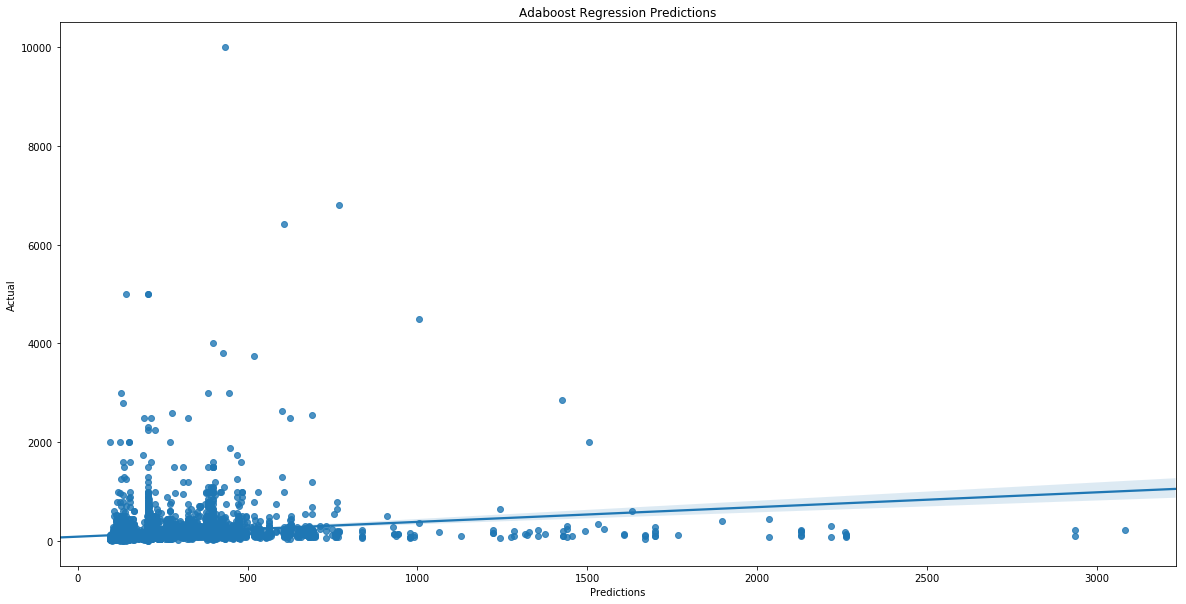

In [51]:
plt.figure(figsize= (20,10))
sns.regplot(ad_errors["Predicted"],ad_errors["Actuals"])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Adaboost Regression Predictions")
plt.show()

In [52]:
rf_reg = RandomForestRegressor()

In [53]:
rf_reg.fit(x_train, y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Manoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
rf_pred = rf_reg.predict(x_test)

In [55]:
r2_score(y_test,rf_pred)

0.09344929732404483

In [56]:
rf_errors = pd.DataFrame({'Actuals': np.array(y_test).flatten(), 'Predicted': rf_pred.flatten()})

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



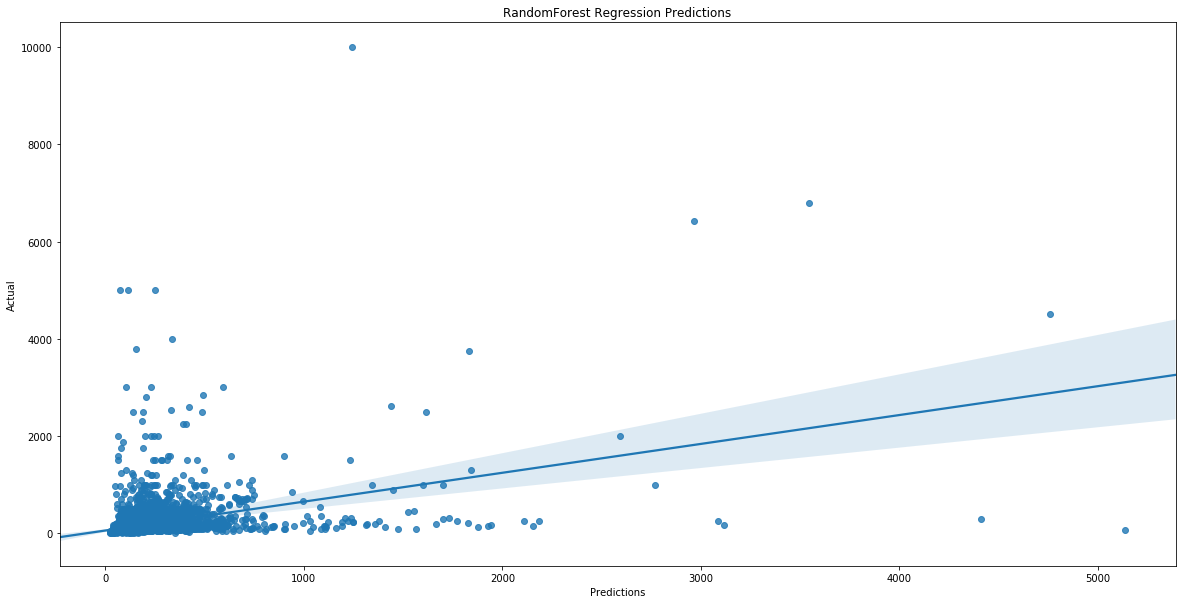

In [57]:
plt.figure(figsize= (20,10))
sns.regplot(rf_errors["Predicted"],rf_errors["Actuals"])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("RandomForest Regression Predictions")
plt.show()

In [58]:
from xgboost import XGBRegressor

In [59]:
xg_reg = XGBRegressor()

In [60]:
xg_reg.fit(x_train,y_train)

[21:16:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [61]:
xg_pred = xg_reg.predict(x_test)

In [62]:
r2_score(y_test, xg_pred)

0.1786900857086685

In [63]:
xg_errors = pd.DataFrame({'Actuals': np.array(y_test).flatten(), 'Predicted': xg_pred.flatten()})

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



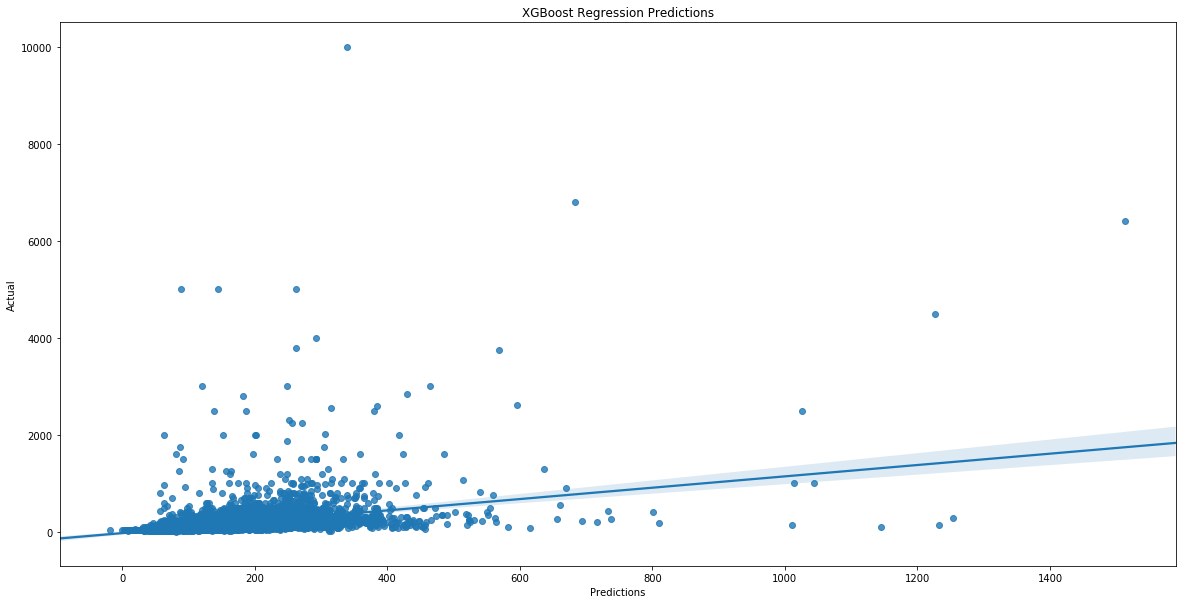

In [64]:
plt.figure(figsize= (20,10))
sns.regplot(xg_errors["Predicted"],xg_errors["Actuals"])
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("XGBoost Regression Predictions")
plt.show()

In [20]:
from sklearn.svm import SVR

In [21]:
sv_reg = SVR()

In [ ]:
sv_reg.fit(x_train, y_train)

C:\Users\Manoj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [57]:
sv_pred = sv_reg.predict(x_test)

In [58]:
r2_score(y_test, sv_pred)

-0.04126608859053116

In [59]:
sv_errors = pd.DataFrame({'Actuals':np.array(y_test).flatten(),'Predicted':sv_pred.flatten()})

C:\Users\Manoj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



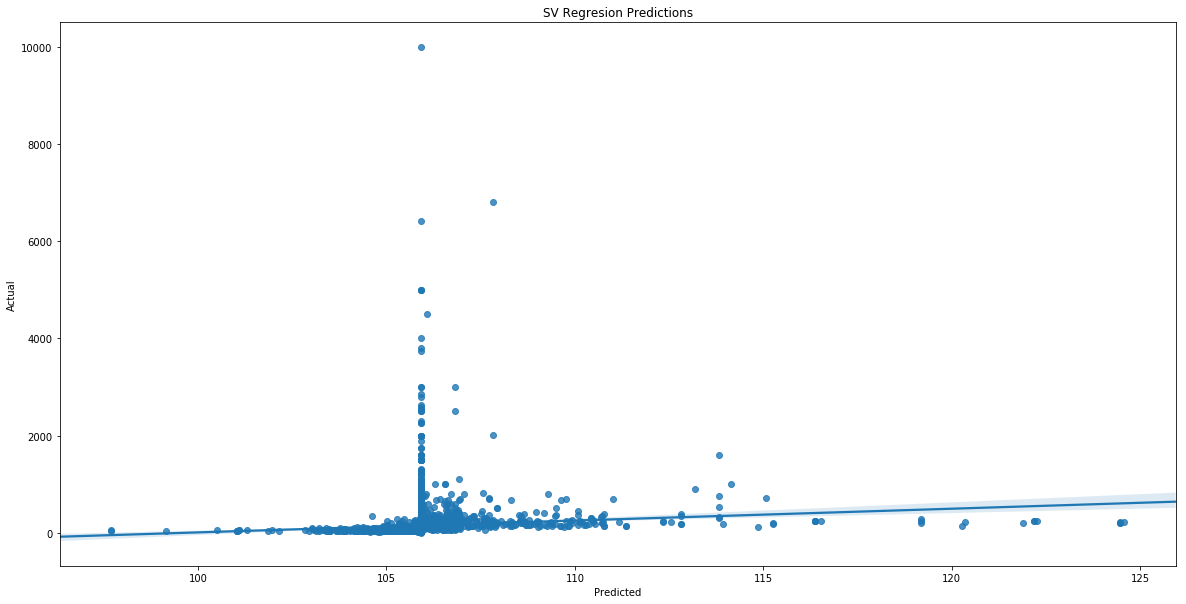

In [60]:
plt.figure(figsize=(20,10))
sns.regplot(sv_errors["Predicted"],sv_errors["Actuals"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SV Regresion Predictions")
plt.show()